In [2]:
import math
import numpy as np
import sympy as sym
import scipy.optimize as spo

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from itertools import combinations_with_replacement
from itertools import permutations

import warnings

**Optimizacion:**
* 2✓
* 3

Generales de probabilidad:
* 4✓
* 8✓

Distribuciones continuas de probabilidad

* 1✓

Hidden Markov Models:

* 1✓

**Minimos Cuadrados:**

* 1b
* 7

**Parameter Estimation:**
* 1


# **Minimos Cuadrados**

## 1b)

In [81]:
A = np.array([
    [2,-1],
    [1,2],
    [1,1]
])

b = np.array([2,1,4])

warnings.filterwarnings("ignore")
print(f"La solucion de minimos cuadrados es :{np.linalg.lstsq(A, b)[0]}")

La solucion de minimos cuadrados es :[1.42857143 0.42857143]


In [103]:
def iterative_ols(A,b,h,append=False):
    #Busqueda iterativa
    min_dist = np.inf
    solution = np.array([])

    vdistances= np.array([])
    vvectors = np.array([], dtype=[('x', float), ('y', float)])

    for i in np.arange(-5,5,h):
        for j in np.arange(-5,5,h):
            temp = np.linalg.norm(A@np.array([i,j])-b)
            if append:
                vdistances = np.append(vdistances,temp)
                vvectors = np.append(vvectors, np.array([(i,j)], dtype=vvectors.dtype))
            if temp < min_dist:
                solution = np.array([i,j])
                min_dist = temp
                
    print(f"La distancia minima encontrada es {min_dist}")
    print(f"El vector con la distancia minima es {solution}")
    
    return solution,min_dist,vvectors,vdistances

Respuesta

In [104]:
iterative_ols(A,b,h=0.01)[0:2]

La distancia minima encontrada es 2.5354683985409867
El vector con la distancia minima es [1.43 0.43]


(array([1.43, 0.43]), 2.5354683985409867)

**La grafica la hice con step h =0.1 porque se demoraba mucho**

La distancia minima encontrada es 2.5377155080899074
El vector con la distancia minima es [1.4 0.4]


Text(0.5, 0.92, 'Distancia $||Ax-b||$ en la region rectangular [-5,5]x[-5,5]')

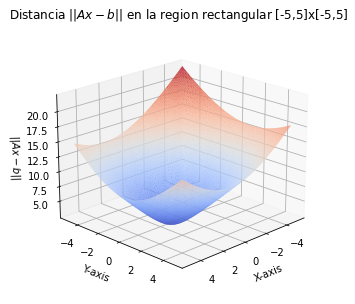

In [107]:
vvectors,vdistances = iterative_ols(A,b,append=True,h=0.1)[2:]

x_values = vvectors['x']
y_values = vvectors['y']

# Create a 3D plot
fig = plt.figure(figsize=(8, 5)) 
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using plot_trisurf
ax.plot_trisurf(x_values, y_values, vdistances, cmap='coolwarm', edgecolor='none')
ax.view_init(elev=20, azim=45)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel(r'$||Ax-b||$')
ax.set_title(r'Distancia $||Ax-b||$ en la region rectangular [-5,5]x[-5,5]')

# **Distribuciones continuas de probabilidad**

## 1)

**a) Verificar si f(x,y) es una funcion de densidad**

In [64]:
x = sym.Symbol("x",real=True)
y = sym.Symbol("y",real=True)

In [66]:
f = (2/3)*(x+2*y)

In [76]:
#f(x,y) es una funcion de densidad porque integra a 1 y es positiva en todo su soporte
res = sym.integrate(f, (y, 0, 1), (x, 0, 1))
res

1.00000000000000

**b) Distribuciones marginales:**

In [72]:
#g(x)
g= sym.integrate(f,(y,0,1))
g

0.666666666666667*x + 0.666666666666667

In [73]:
#h(y)
h = sym.integrate(f,(x,0,1))
h

1.33333333333333*y + 0.333333333333333

**c) E(x)**

In [93]:
Ex = sym.integrate(g*x,(x,0,1))
Ex

0.555555555555556

**d) E(y)**

In [92]:
Ey = sym.integrate(h*y,(y,0,1))
Ey

0.611111111111111

**e) $\sigma_{xy}$**

In [87]:
res = sym.integrate(f*x*y, (y, 0, 1), (x, 0, 1)) - sym.integrate(h*y,(y,0,1))*sym.integrate(g*x,(x,0,1))
res

-0.00617283950617281

**d) $\sigma_{xy}$**

In [101]:
sym.integrate(f*(x-Ex)*(y-Ey),(y, 0, 1), (x, 0, 1))

-0.00617283950617285

**f) Son independientes X y Y?**

In [102]:
f

0.666666666666667*x + 1.33333333333333*y

In [94]:
g*h

(0.666666666666667*x + 0.666666666666667)*(1.33333333333333*y + 0.333333333333333)

X y Y **no** son independientes porque $f(x,y)\neq g(x)\cdot h(y)$

# **Optimizacion**

## 2)

In [29]:
def f(p):
    return p[0]**2+p[1]**2+p[2]**2-2*p[2]+1

In [28]:
constraints = ( {'type':'eq','fun': lambda p: 2*p[0] -4*p[1] + 5*p[2] - 2} )

p0 = [1,1,1]
result = spo.minimize( f, p0, constraints = constraints )
result

     fun: 0.20000000000216844
     jac: array([-0.26666896,  0.53333158, -0.66666715])
 message: 'Optimization terminated successfully.'
    nfev: 22
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([-0.13333449,  0.26666578,  0.66666642])

## 3)

----

# **Generales de probabilidad**

## 4)

Calcular la probabilidad de que n personas, con $n\leq 365$ tengan fechas diferentes de cumpleaños

In [11]:
#suponemos que no hay años bisiestos
def p_cumpleaños(n,bound=365):
    #espacio muestral: por cada persona tenemos 365 posibilidades de dias de cumpleaños. 
    #entonces el espacio muestral consiste de n-tuplas donde cada entrada es un numero entre 1 y 365
    S = bound**n
    
    #Si todos los cumpleaños son distintos, entonces estamos considerando n-tuplas cuyas entradas no se repiten
    ns = math.factorial(bound)/math.factorial(bound-n)

    return np.round(ns/S,4)
    

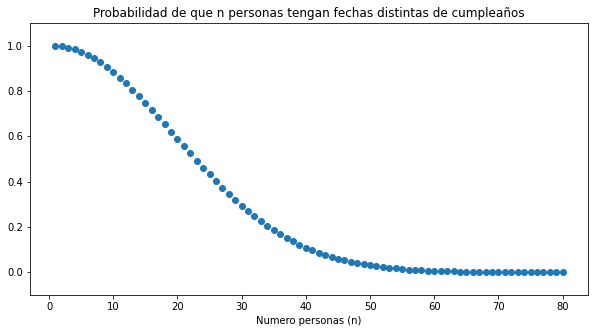

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

n = np.arange(1,81,1)
probs = np.array([p_cumpleaños(i) for i in range(1,81)])

ax.set_title("Probabilidad de que n personas tengan fechas distintas de cumpleaños")
ax.set_xlabel("Numero personas (n)")
ax.set_ylim(-.1,1.1)

ax.scatter(n,probs)

## 8)

In [60]:
N = 100000
m1 = np.random.binomial(1,0.5,size=N)
m1[m1 == 0] = -1
m2 = np.random.binomial(1,0.5,size=N) 
m2[m2 == 0] = -1
m3 = np.random.binomial(1,0.5,size=N) 
m3[m3 == 0] = -1
m4 = np.random.binomial(1,0.5,size=N) 
m4[m4 == 0] = -1

result_tuples = [(m1[i], m2[i], m3[i], m4[i]) for i in range(len(m1))]

In [67]:
counter = 0 
for e in result_tuples:
    if sum(e) == 0:
        counter+=1

print(f"La probabilidad de obtener 2 caras y 2 sellos es aprox: {counter/N}")

La probabilidad de obtener 2 caras y 2 sellos es aprox: 0.37533


---

# **Hidden Markov Models**

In [53]:
T = np.array([
    [.8,.2],
    [.2,.8]
])

E = np.array([
    [.5,.9],
    [.5,.1]
])

Prior = np.array([.2,.8])

States = np.array([0,1]) # Deben ser enteros 

In [43]:
def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)

In [44]:
HiddenStates = GetStates(States,8)

In [45]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[1]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    return p

In [46]:
#Observamos [S,C,C,C,S,C,S,C]
Obs = np.array([1,0,0,0,1,0,1,0])

P = np.zeros(HiddenStates.shape[0], dtype=np.float64)

for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
    

In [54]:
ii = np.where( P == np.amax(P))
print(f"El estado oculto mas probable {HiddenStates[ii]}, donde 0 = Justa, 1=Sesgada")
print(f"La probabilidad del estado oculto mas probable es aprox: {np.round(np.amax(P),4)}")

El estado oculto mas probable [[0 1 1 1 0 0 0 0]], donde 0 = Justa, 1=Sesgada
La probabilidad del estado oculto mas probable es aprox: 0.0002


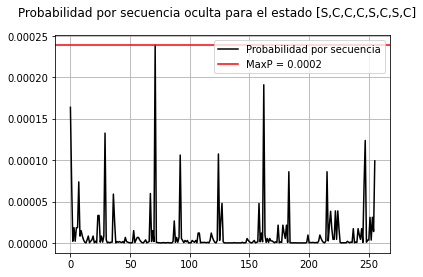

In [55]:
plt.plot(P, color='black',label = "Probabilidad por secuencia")
plt.axhline(y=np.amax(P), color='r', linestyle='-',label=f"MaxP = {np.round(np.amax(P),4)}")
plt.suptitle("Probabilidad por secuencia oculta para el estado [S,C,C,C,S,C,S,C]")
plt.legend(loc = "upper right")
plt.grid()

b) Verificar que $\sum P_o = 1$:

In [35]:
#todas las posibles observaciones
ObsStates = GetStates([0,1],8)

Nobs = ObsStates.shape[0]
PObs = np.zeros(Nobs)

for j in range(Nobs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)

In [38]:
#Suma de probabilidades de los estados observables
np.sum(PObs)

1.0000000000000007